# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(list(y_train)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

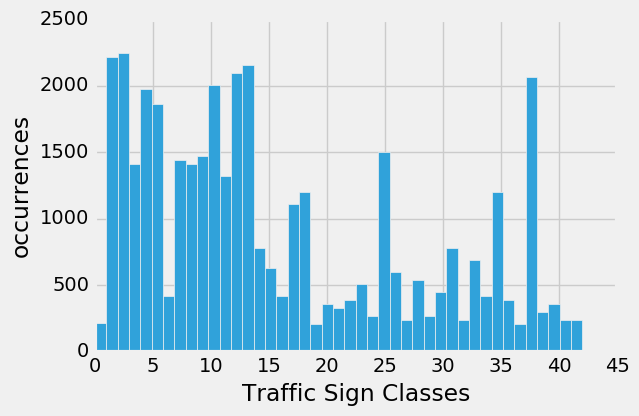

In [4]:
# Show the class label distribution in a histogram
# Create a histogram of training lables
with plt.style.context('fivethirtyeight'):
    fig = plt.figure()
    n, bins, patches = plt.hist(y_train, n_classes)

    plt.xlabel('Traffic Sign Classes')
    plt.ylabel('occurrences')
    plt.show()


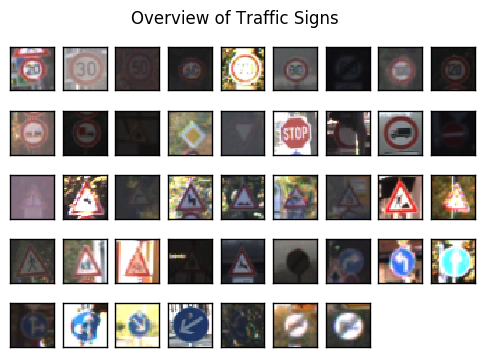

In [5]:
fig = plt.figure()
fig.suptitle('Overview of Traffic Signs', fontsize=12)

# Create an overview of trafic sign classes
Rows = 5
Cols = (n_classes / Rows) + 1
for clas in range(n_classes):
    for i in range(0, len(y_train)):
        if (y_train[i] == clas):
            plt.subplot(Rows, Cols, clas + 1)
            fig = plt.imshow(X_train[i, :, :, :], interpolation='nearest')
            fig.axes.get_xaxis().set_visible(False)
            fig.axes.get_yaxis().set_visible(False)
            break
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import random
import cv2
import numpy as np
random.seed(10)

In [7]:
#Shuffle
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [8]:
def preprocess_image(image):
    """
    Let's convert our image to a different color space 
    and then normalize our data
    """
    yuv_img = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    yuv_img[:, :, 0] = cv2.equalizeHist(yuv_img[:, :, 0])
    return (yuv_img / 255. * 2.) - 1.


# all_processed_training_features = np.array([pre_process_image(X_train[i]) for i in range(len(X_train))], dtype=np.float32)
X_train = [preprocess_image(X_train[i]) for i in range(len(X_train))]
X_test = [preprocess_image(X_test[i]) for i in range(len(X_test))]
# test_features = np.array([pre_process_image(X_test[i]) for i in range(len(X_test))], dtype=np.float32)

YUV images


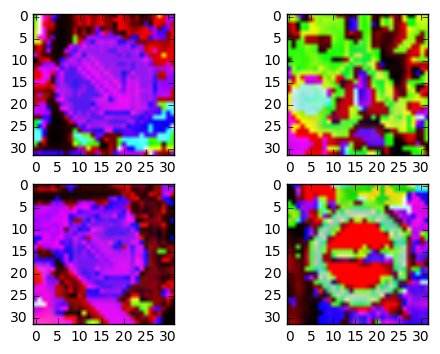

In [9]:
# Plot four sample images
print('YUV images')
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_train[i*2500+1])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

* A random seed was added so we can reproduce the results later. Calling it will give us the same set of numbers
* The training data was then shuffled to remove the possibility of order as a confounding factor
* Next, the image was converted to a different color space in hopes to improve accuracy.  YUV will negate the effects of brightness on the images, ideally.
* Finally, the images were normalized with a mean 0

In [10]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
 
#Shuffle and Split Train Data to Randomize
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
* The training set was split into a new, smaller training set and a validation set using the train_test_split method from sklearn.model_selection. Specifically, it was split 80/20.
* The test set stayed the same.
* The use of a cross validation set is to allow for improvements and iterations of the model as it keeps the test set held out and unseen until the very end.  When the cross validation set is optimized, we can then try it on the test set.

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
### Define your architecture here.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

# Initialize Hyperparameters
mu = 0
sigma = 0.1

# Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
# Remember: out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))
# Convolve filter over the images and add the bias
conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

# Activation.
# Activate the output of the convolutional layer with a ReLU function
conv1 = tf.nn.relu(conv1)

# Pooling. Input = 28x28x6. Output = 14x14x6.
# Pooling is basically a modern term for resampling
# Remember: out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
conv1 = tf.nn.max_pool(conv1, ksize=[1,2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# Layer 2: Convolutional. Output = 10x10x16.
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(16))
conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
# Activation.
conv2 = tf.nn.relu(conv2)

# Flatten. Input = 10x10x16. Output = 1600.
fc0 = flatten(conv2)

# Layer 3: Fully Connected. Input = 1600. Output = 512.
fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 512), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(512))
fc1 = tf.matmul(fc0, fc1_W) + fc1_b

# Activation.
fc1 = tf.nn.relu(fc1)
fc1 = tf.nn.dropout(fc1, keep_prob)

# Layer 4: Fully Connected. Input = 512. Output = 256.
fc2_W = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
fc2_b = tf.Variable(tf.zeros(256))
fc2 = tf.matmul(fc1, fc2_W) + fc2_b

# Activation.
fc2 = tf.nn.relu(fc2)
fc2 = tf.nn.dropout(fc2, keep_prob)

# Layer 5: Fully Connected. Input = 256. Output = 43.
# We're looking at 43 classes of traffic signs
fc3_W = tf.Variable(tf.truncated_normal(shape=(256, 43), mean = mu, stddev = sigma))
fc3_b = tf.Variable(tf.zeros(43))
fc3 = tf.matmul(fc2, fc3_W) + fc3_b
logits = fc3


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
* The architecture resembles the classic LeNet architecture. 
* It consists of 2 convolutional layers with a depth of 6 and 16.
* It also has a pooling layer applied which reduces the images size by half
* After the convolution layers we have 3 fully connected layers.  
    * The first has an output of 512, the second with 256, and the third with 43 (our y class amount)
* I also implemented dropout with a probablity of .5 as a regularization component to help prevent overfitting
    * Dropout creates redundancies which make the model more robust and less prone to overfitting
    * Because of it's design, which makes the network take a consensus it acts like an ensemble method.
* The 3rd and final layer, mentioned earlier, takes 256 inputs and gives a logit for each of the classes we have (43).

In [12]:
### Feel free to use as many code cells as needed.
### Train your model here.
from sklearn.utils import shuffle

# Let's determine the number of epochs, batch size
EPOCHS = 25
BATCH_SIZE = 50

#How quickly do we want our algo to update the network's weights?
rate = 0.001

# What weight would we like for l2 regularization?
beta = 0.001

# What probablitity would we like to use for dropout?
keep_prob_dropout = 0.5

# Define name used to store the model
save_name = 'traffic_sign_classifier'

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    #Tracking the loss too
    total_loss = 0
    sess = tf.get_default_session()
    # Batches the dataset and runs it through the evaluation
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        a, l = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (a * len(batch_x))
        total_loss += (l * len(batch_x))
    return (total_accuracy / num_examples, total_loss / num_examples)

# Compares the logits to the ground truth labels and calculate the cross entropy 
# The cross entropy is like a similarity / distance metric
# That checks to see how far our prediction is from the ground truth label
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

# Reduce_mean averages the cross_entropy from all the training images
loss_operation = tf.reduce_mean(cross_entropy)

loss_operation = (loss_operation +
            (beta * tf.nn.l2_loss(fc1_W)) + (beta * tf.nn.l2_loss(fc1_b)) + 
            (beta * tf.nn.l2_loss(fc2_W)) + (beta * tf.nn.l2_loss(fc2_b)) + 
            (beta * tf.nn.l2_loss(fc3_W)) + (beta * tf.nn.l2_loss(fc3_b)))

# AdamOptimizer uses the adam algo to minimize the loss function, like SGD
# It's a good default choice
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

# Finally we run the minimize function on the optimizer
# Uses backprop to update the network and minimize our loss
training_operation = optimizer.minimize(loss_operation)

# Evaluate how well the loss and accuracy of the model for a given dataset.
# Step 1 - Measure whether a given prediction is correct by comparing logit prediction
# to a one hot encoded ground trugh label
# Step 2 - Calc overall accuracy by averaging the individual prediction accuracies

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

historical_train_loss = []
historical_valid_loss = []
historical_train_acc = []
historical_valid_acc = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        
        total_accuracy = 0
        total_loss = 0
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            # Batch the data and train it
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_dropout})
            a, l = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
            total_accuracy += (a * len(batch_x))
            total_loss += (l * len(batch_x))
            
        train_accuracy = total_accuracy / num_examples
        train_loss = total_loss / num_examples
        
        historical_train_acc.append(train_accuracy)
        historical_train_loss.append(train_loss)
            
        (validation_accuracy, validation_loss) = evaluate(X_cv, y_cv)
        
        historical_valid_acc.append(validation_accuracy)
        historical_valid_loss.append(validation_loss)
        
        print("EPOCH {} ...".format(i+1))
        print("CV Accuracy = {:.3f}".format(validation_accuracy))
        print("CV Loss = {:.3f}".format(validation_loss))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, save_name)
    print("Model saved as " + save_name)

EPOCH 1 ...
CV Accuracy = 0.932
CV Loss = 1.838

EPOCH 2 ...
CV Accuracy = 0.958
CV Loss = 1.062

EPOCH 3 ...
CV Accuracy = 0.974
CV Loss = 0.704

EPOCH 4 ...
CV Accuracy = 0.975
CV Loss = 0.555

EPOCH 5 ...
CV Accuracy = 0.978
CV Loss = 0.474

EPOCH 6 ...
CV Accuracy = 0.981
CV Loss = 0.420

EPOCH 7 ...
CV Accuracy = 0.982
CV Loss = 0.413

EPOCH 8 ...
CV Accuracy = 0.981
CV Loss = 0.390

EPOCH 9 ...
CV Accuracy = 0.985
CV Loss = 0.376

EPOCH 10 ...
CV Accuracy = 0.984
CV Loss = 0.368

EPOCH 11 ...
CV Accuracy = 0.985
CV Loss = 0.368

EPOCH 12 ...
CV Accuracy = 0.983
CV Loss = 0.372

EPOCH 13 ...
CV Accuracy = 0.984
CV Loss = 0.347

EPOCH 14 ...
CV Accuracy = 0.985
CV Loss = 0.354

EPOCH 15 ...
CV Accuracy = 0.985
CV Loss = 0.353

EPOCH 16 ...
CV Accuracy = 0.987
CV Loss = 0.348

EPOCH 17 ...
CV Accuracy = 0.989
CV Loss = 0.331

EPOCH 18 ...
CV Accuracy = 0.986
CV Loss = 0.344

EPOCH 19 ...
CV Accuracy = 0.987
CV Loss = 0.330

EPOCH 20 ...
CV Accuracy = 0.990
CV Loss = 0.326

EPOCH 21 

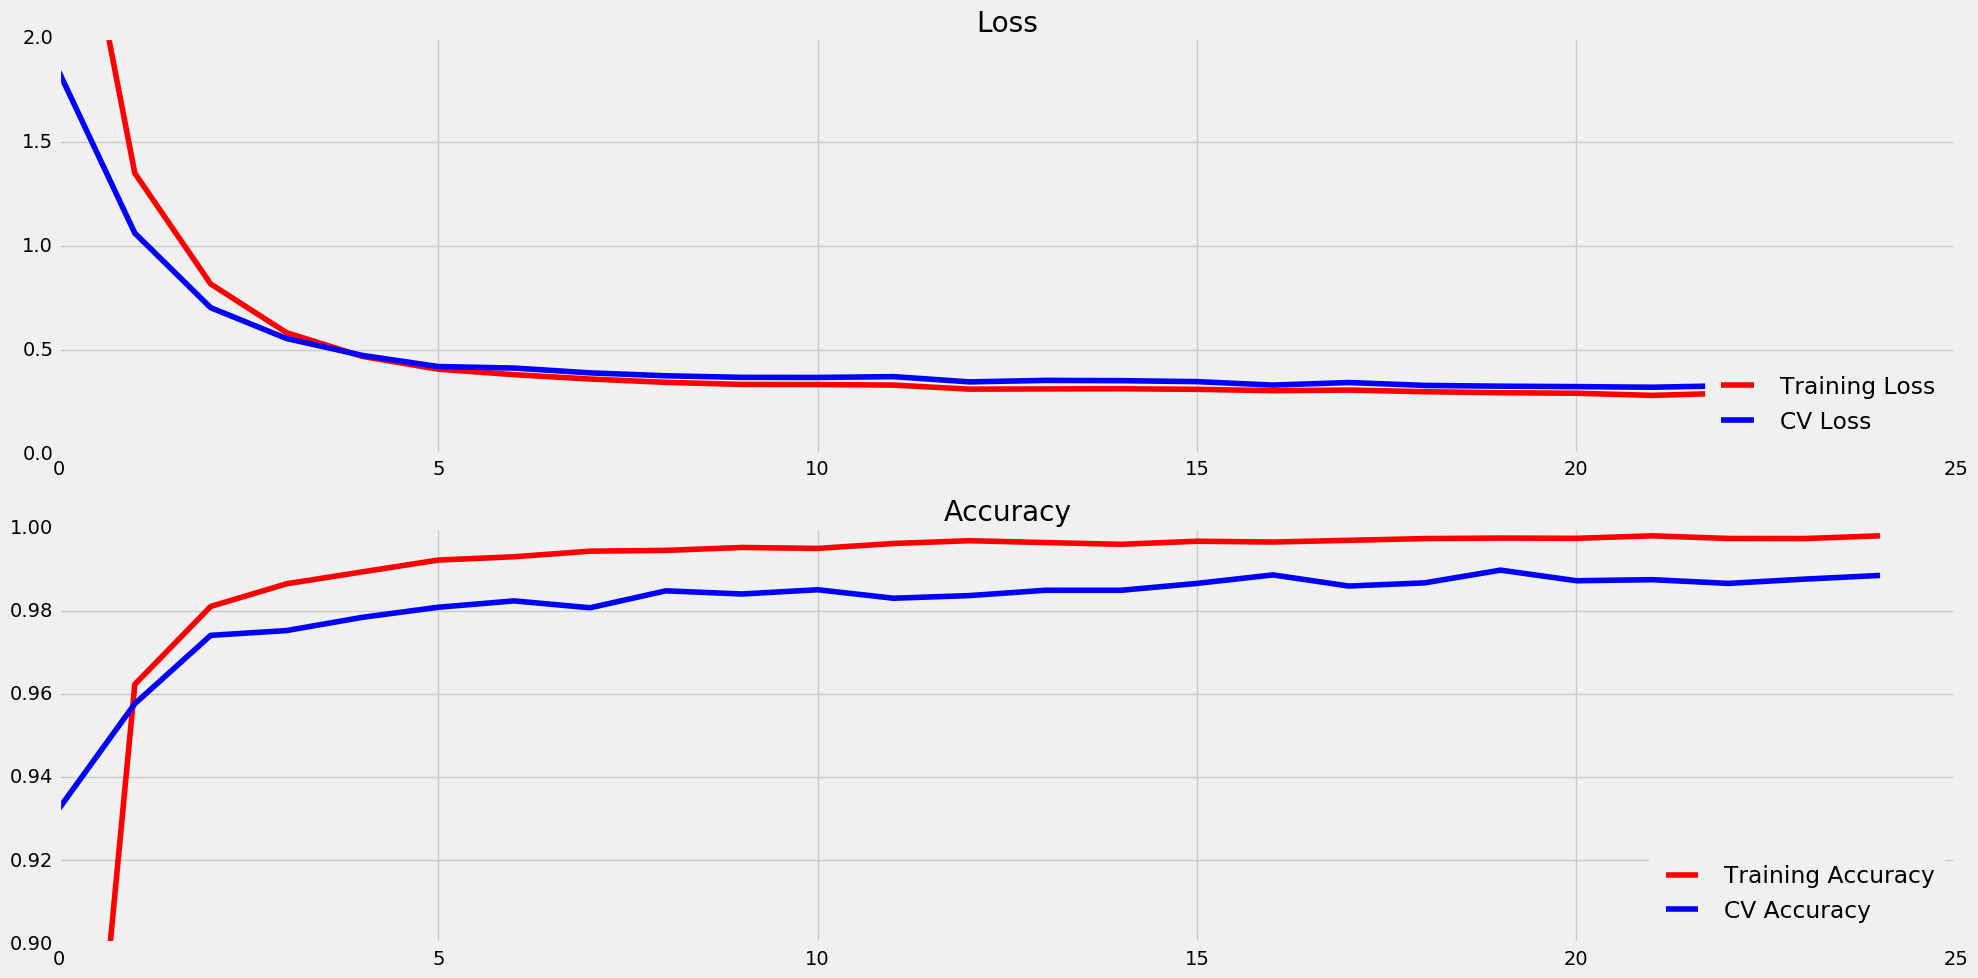

In [13]:
# Show the class label distribution in a histogram
# Create a histogram of training lables
with plt.style.context('fivethirtyeight'):

    ### Visualize training progress
    plt.figure(figsize=(20,10))
    loss_plot = plt.subplot(211)
#     plt.figure(figsize=(20,10))
    loss_plot.set_title('Loss')
    loss_plot.plot(range(0, len(historical_train_loss)), historical_train_loss, 'r', label='Training Loss')
    loss_plot.plot(range(0, len(historical_train_loss)), historical_valid_loss, 'b', label='CV Loss')
    loss_plot.set_ylim([0.0, 2.0])
    loss_plot.legend(loc=4)
    acc_plot = plt.subplot(212)
    acc_plot.set_title('Accuracy')
    acc_plot.plot(range(0, len(historical_train_loss)), historical_train_acc, 'r', label='Training Accuracy')
    acc_plot.plot(range(0, len(historical_train_loss)), historical_valid_acc, 'b', label='CV Accuracy')
    acc_plot.set_ylim([0.9, 1.0])
    acc_plot.legend(loc=4)
    plt.tight_layout()
    plt.show()


In [14]:
### Evaluate test set
with tf.Session() as sess:
    loader = tf.train.import_meta_graph(save_name + '.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    (test_accuracy, test_loss) = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Test Accuracy = 0.946


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
* To train, I used:
    * An adam optimizer 
    * 50 batch size
    * 25 epochs
    * A dropout prob set to .5
    * A regularization coefficient of .001
    * A normalized distribution with zero mean and sigma 1


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
* I used the LeNet architecture given in class and adapted it for this problem
    * That is to say this time we're working with working with a image depth of 3 this time instead of 1 and 43 classes instead of 10.
* Then I ran it through as is, 
* Then I iterated on it by adding dropout and l2 regularization to limit overfitting
* Finally I added U an V channels to the conv layer, giving me a test accuracy of ~95%
* To improve even further I could generate more data, however not sure by how much the accuracy would increase


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [15]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [16]:
os.listdir("data/test_images/")

['test_image16.png',
 'test_image13.png',
 'test_image3.png',
 'test_image9.png',
 'test_image18.png']

test_image16.png
test_image13.png
test_image3.png
test_image9.png
test_image18.png


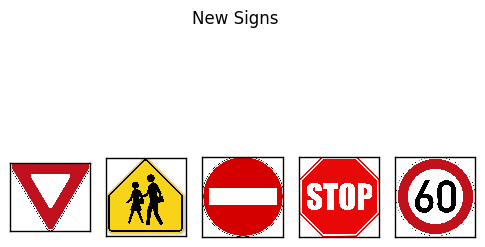

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
    
filenames = os.listdir("data/test_images/")


# Create an overview of traffic sign classes and store them in list
fig = plt.figure()
fig.suptitle('New Signs', fontsize=12)

new_traffic_signs = []

for el, filename in enumerate(filenames[-5:]):
#     try:
        print (filename)
        img = mpimg.imread("data/test_images/"+filename)
        plt.subplot(1, 5, el + 1)
        fig = plt.imshow(img, interpolation='nearest')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        # Resize images to 32x32 and add to list
        img_resize = (img * 255.)
        img_resize = img_resize.astype(np.uint8)
        new_traffic_signs.append(cv2.resize(img_resize, (32, 32)))
#     except:
#         pass

plt.show()


In [18]:
new_traffic_signs_labels = [13,28, 17, 14, 3]

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
* I chose the images based off of a few things.
    * I chose the 60 speed limit stop sign because it was close to the one from the udacity lessons.
        * I don't think this will be difficult for the network to identify.  It's a common shape, and sign.
    * I know the dataset we're training on is from Europe, Germany specifically, but I live in the US.
        * Therefore I wanted to see how it handled signs from the US aka the other 4.  I figure it's going to make it more difficult but overall it should be able to abstract and identify the correct class
    * I wanted a few that were well known which is why I chose a stop sign, no entry, and yield.  I think this should be fairly easy to identify since they are pretty universal signs.
    * I also wanted to see if it could handle a yellow colored sign with a unique shape and visualization.  This will be difficult


In [19]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# Preprocess image data and convert to np array
new_images = [preprocess_image(img) for img in new_traffic_signs]

# Define new metric for softmax prediciton
prediction = tf.nn.softmax(logits)

with tf.Session() as sess:
    loader = tf.train.import_meta_graph(save_name + '.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    s_max, test_accuracy = sess.run([prediction, accuracy_operation],
                                    feed_dict={x: new_images, y: new_traffic_signs_labels, keep_prob: 1.0})

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
* The classifier detected 4 out of my 5 images.
* The model test set has a ~95% accuracy, so 80% is not great.  Sure it's a small sample (5), so we don't have enough information to say it's really 80% and not higher, but still it doesn't seem like it would generalize to live data that well.  
* Some notes:
    * It accurately predict the children crossing image which took me by surprise due to the shape, and the color differences from the norm.
    * It didn't predict the 60km/h sign, and I'd imagine it'd only get weaker in the real world.
        * This was a strange one, however due to the image size I could see how the numbers look very similar.
* For this reason I feel like my next step should be to rotate the images, and add new ones to the training set.  I can also turn the knobs on the hyperparameters but rotating and creating new data would be my first move.

In [20]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
print("Accuracy on new images is = {:.2f}".format(test_accuracy))

Accuracy on new images is = 0.80


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
* The stop sign, no entry sign, yield sign, and children crossing signs were accurately predicted.
* The model is certain of its predictions of the stop sign, entry sign, and yield sign to a high degree (.95-1)
* It is less certain but still accurately predicted the children crossing sign.
    * I am fairly impressed as it is an atypical sign.
* It had trouble predicting the 60km/h sign, which is a point of concern.
    * While it did not predict it correctly, the correct prediction does appear in the top 5.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [21]:
import csv
# Read sign names from csv
with open("signnames.csv", 'r') as f:
    reader = csv.reader(f)
    sign_names = list(reader)
    sign_names = np.asarray(sign_names[1:])

In [22]:
print (sign_names[new_traffic_signs_labels, :])
new_traffic_signs_labels

[['13' 'Yield']
 ['28' 'Children crossing']
 ['17' 'No entry']
 ['14' 'Stop']
 ['3' 'Speed limit (60km/h)']]


[13, 28, 17, 14, 3]

In [23]:
# Get the top 5 predictions
with tf.Session() as sess:
    top_pred = sess.run(tf.nn.top_k(tf.constant(s_max), k=5))

# Print the results for the given images
for actual, prediction, probability in zip(new_traffic_signs_labels, top_pred[1], top_pred[0]):
    print("\"{}\" was classified as:".format(sign_names[actual, :][1]))
    for ind in range(len(prediction)):
        print("\t{}:\"{}\" with {}".format(ind, sign_names[prediction[ind], :][1], probability[ind]))
 

"Yield" was classified as:
	0:"Yield" with 0.9993033409118652
	1:"Priority road" with 0.0003186214598827064
	2:"No vehicles" with 0.00015602829807903618
	3:"Speed limit (60km/h)" with 8.889826131053269e-05
	4:"Bicycles crossing" with 4.425939914654009e-05
"Children crossing" was classified as:
	0:"Children crossing" with 0.33228349685668945
	1:"Speed limit (120km/h)" with 0.08693158626556396
	2:"Ahead only" with 0.07292727380990982
	3:"Priority road" with 0.06291256844997406
	4:"End of all speed and passing limits" with 0.04984763637185097
"No entry" was classified as:
	0:"No entry" with 0.9993711113929749
	1:"Stop" with 0.00034876566496677697
	2:"Speed limit (30km/h)" with 0.00014099870168138295
	3:"Speed limit (20km/h)" with 4.8716367018641904e-05
	4:"Bumpy road" with 2.4493394448654726e-05
"Stop" was classified as:
	0:"Stop" with 0.9548895359039307
	1:"Speed limit (30km/h)" with 0.026516981422901154
	2:"No entry" with 0.0048466953448951244
	3:"End of speed limit (80km/h)" with 0.003

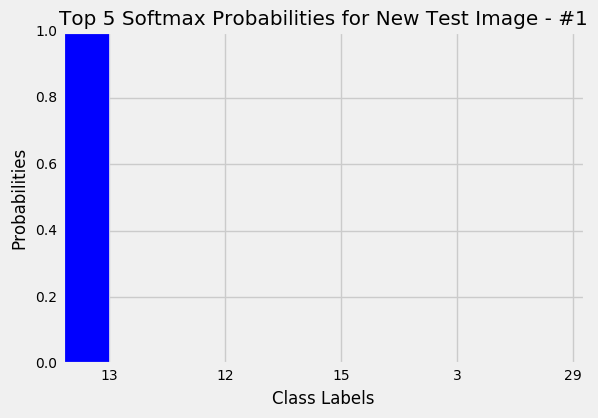

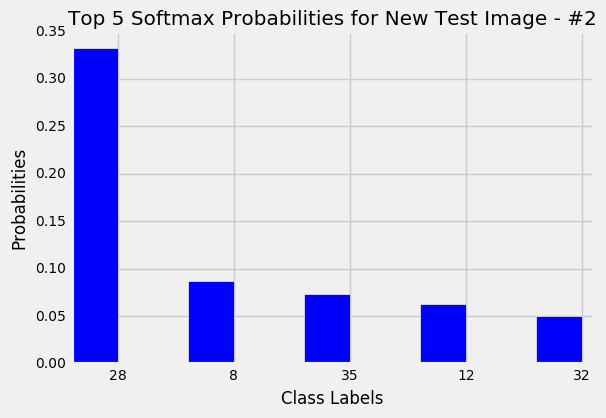

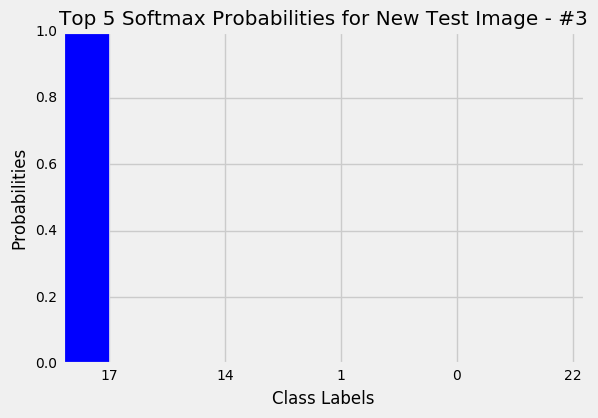

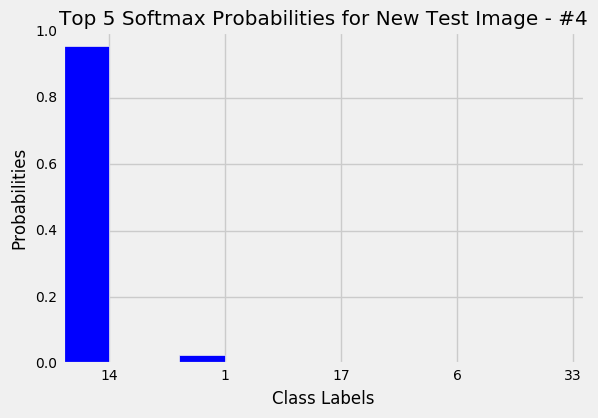

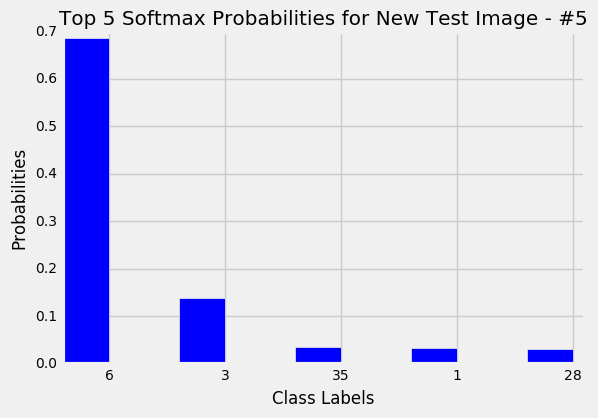

In [24]:
N = 5

ind = np.arange(N)  

with plt.style.context('fivethirtyeight'):  
    for i in range(5):
        plt.figure(i)
        values = top_pred[0][i]
        plt.bar(range(N), values, 0.40, color='b')
        plt.ylabel('Probabilities')
        plt.xlabel('Class Labels')
        plt.title('Top {} Softmax Probabilities for New Test Image - #{}'.format(N, str(i+1)))
        plt.xticks(ind+0.40, tuple(top_pred[1][i]))

plt.show()